In [ ]:
data=pd.read_excel("Emp-Pop Ratio 15-19 Year Old.xlsx")
data

,COUNTRY,Country,SEX,Series,Time,Value
0,AUS,Australia,MW,Employment/population ratio,2010,46.623205
1,AUS,Australia,MW,Employment/population ratio,2011,46.416793
2,AUS,Australia,MW,Employment/population ratio,2012,45.545769
3,AUS,Australia,MW,Employment/population ratio,2013,44.915151
4,AUS,Australia,MW,Employment/population ratio,2014,43.760757
...,...,...,...,...,...,...
424,COL,Colombia,MW,Employment/population ratio,2016,26.836141
425,COL,Colombia,MW,Employment/population ratio,2017,25.696627
426,COL,Colombia,MW,Employment/population ratio,2018,24.511748
427,COL,Colombia,MW,Employment/population ratio,2019,22.571870


In [ ]:
print(data.iloc[75])
print(data.iloc[76])

COUNTRY                            FIN
Country                        Finland
SEX                                 MW
Series     Employment/population ratio
Time                              2019
Value                         28.73289
Name: 75, dtype: object
COUNTRY                            FIN
Country                        Finland
SEX                                 MW
Series     Employment/population ratio
Time                              2020
Value                        26.831238
Name: 76, dtype: object


In [ ]:
s=set()
for i in range(len(data)-1):
    ctry=data.iloc[i]['Country']
    if data.iloc[i]['Time']==2019 and data.iloc[i]['SEX']=="MW":
        if data.iloc[i]['Value']<data.iloc[i+1]['Value']:
            s.add(ctry)
s

{'Austria'}

Every country (except one) actually saw a decrease in child employment rates! But how come?

Our guess: Their parents' employment rates also decreased, not just child employement.. Lets test this out!

In [ ]:
datap=pd.read_excel("Emp-Pop Ratio 40-49 Year Old.xlsx")
datap

,COUNTRY,Country,SEX,Time,Value
0,AUS,Australia,MW,2010,80.437599
1,AUS,Australia,MW,2011,80.479404
2,AUS,Australia,MW,2012,80.684897
3,AUS,Australia,MW,2013,80.394863
4,AUS,Australia,MW,2014,80.005800
...,...,...,...,...,...
435,CRI,Costa Rica,MW,2016,71.968366
436,CRI,Costa Rica,MW,2017,75.541145
437,CRI,Costa Rica,MW,2018,75.264820
438,CRI,Costa Rica,MW,2019,76.556690


In [ ]:
s2=set()
for i in range(len(datap)-1):
    ctry=datap.iloc[i]['Country']
    if datap.iloc[i]['Time']==2019 and datap.iloc[i]['SEX']=="MW":
        if datap.iloc[i]['Value']<datap.iloc[i+1]['Value']:
            s2.add(ctry)
s2

{'Luxembourg', 'Slovenia'}

In [ ]:
datap['Country'].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom', 'United States', 'OECD countries',
       'Israel', 'Chile', 'Slovenia', 'Estonia', 'Lithuania', 'Latvia',
       'Colombia', 'Costa Rica'], dtype=object)

Only 2 out of the 39 countries in the dataset actually had an increase in employement rates.

This supports our hypothesis of the employment rate of the parents of each country decreasing, not only the child employment rates

Now, we shall check which countries have a larger drop in child employment rates than their parent employment rates

In [ ]:
childdic={}
for i in range(len(data)-1):
    ctry=data.iloc[i]['Country']
    if data.iloc[i]['Time']==2019 and data.iloc[i]['SEX']=="MW":
        childdic[ctry]=data.iloc[i]['Value'] - data.iloc[i+1]['Value']
childdic

{'Australia': 3.132184371270405,
 'Austria': -0.45975206690240356,
 'Belgium': 1.3881680696875094,
 'Canada': 6.6668497365088015,
 'Czech Republic': 1.0559892441852607,
 'Denmark': 1.9327259147057987,
 'Finland': 1.9016516686837974,
 'France': 0.518961758304,
 'Germany': 0.49944846315950286,
 'Greece': 0.008007008648079683,
 'Hungary': 1.41177197862367,
 'Iceland': 6.318247811815496,
 'Ireland': 2.2114871468100006,
 'Italy': 0.5052520430017098,
 'Japan': 1.8782572441108982,
 'Korea': 0.9693570408033105,
 'Luxembourg': 2.27234312027565,
 'Mexico': 2.3196091951046007,
 'Netherlands': 2.6878616863464018,
 'New Zealand': 1.0228254824760015,
 'Norway': 0.9943082706348036,
 'Poland': 0.5958899358645802,
 'Portugal': 2.31719787762166,
 'Slovak Republic': 0.41493049365833024,
 'Spain': 2.4830274176765608,
 'Sweden': 4.548796271529401,
 'Switzerland': 1.7400121706695941,
 'Turkey': 4.155481622276401,
 'United Kingdom': 3.5801941386974008,
 'United States': 2.519669348078903,
 'OECD countries': 

In [ ]:
parentdic={}
for i in range(len(datap)-1):
    ctry=datap.iloc[i]['Country']
    if datap.iloc[i]['Time']==2019 and datap.iloc[i]['SEX']=="MW":
        parentdic[ctry]=datap.iloc[i]['Value'] - datap.iloc[i+1]['Value']
parentdic

{'Australia': 1.4490676267937914,
 'Austria': 0.34962460989399347,
 'Belgium': 0.4170801296998974,
 'Canada': 3.397353901910094,
 'Czech Republic': 0.1195873535958043,
 'Denmark': 0.9021246870516109,
 'Finland': 0.45530429147770235,
 'France': 0.7096948323416115,
 'Germany': 0.6449307437140988,
 'Greece': 1.143077495573209,
 'Hungary': 1.7722516293449928,
 'Iceland': 2.4221276905831104,
 'Ireland': 0.8118792443911929,
 'Italy': 0.6452133223402967,
 'Japan': 0.7629870129870113,
 'Korea': 1.3134907828160038,
 'Luxembourg': -1.7920188007947928,
 'Mexico': 2.8377817560107985,
 'Netherlands': 0.32958494904158897,
 'New Zealand': 1.095410218802499,
 'Norway': 2.073676007310695,
 'Poland': 0.5851569186886962,
 'Portugal': 1.5355741287822013,
 'Slovak Republic': 1.6740922662390005,
 'Spain': 1.8329590497245931,
 'Sweden': 2.1784826074853925,
 'Switzerland': 1.0183849607062,
 'Turkey': 2.277058924062601,
 'United Kingdom': 0.1944675376482934,
 'United States': 4.0940362413115,
 'OECD countries'

In [ ]:
arr=[]
for key in childdic:
    if childdic[key]>parentdic[key]:
        arr.append(key)
arr

['Australia',
 'Belgium',
 'Canada',
 'Czech Republic',
 'Denmark',
 'Finland',
 'Iceland',
 'Ireland',
 'Japan',
 'Luxembourg',
 'Netherlands',
 'Poland',
 'Portugal',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'OECD countries',
 'Israel',
 'Slovenia',
 'Estonia',
 'Lithuania',
 'Latvia']

In [ ]:
len(arr)

24

Hence, majority of the children were made redundant during COVID 19 pandemic in 2020. This temporarily reduced the amount of child labor due to them having low skills job that cannot be done remotely. However, with the vaccines now becoming popular, people are now being able to work in person jobs again, which would lead to child employment rates increasing this year.

Let us use Machine Learning to Predict the Child Employement Rate for 2021

In [ ]:
mldata=pd.read_excel("Emp-Pop Ratio 15-19 Year Old.xlsx")
mldata

,Continent,Country,SEX,Series,Time,Value
0,AUS,Australia,MW,Employment/population ratio,2010,46.623205
1,AUS,Australia,MW,Employment/population ratio,2011,46.416793
2,AUS,Australia,MW,Employment/population ratio,2012,45.545769
3,AUS,Australia,MW,Employment/population ratio,2013,44.915151
4,AUS,Australia,MW,Employment/population ratio,2014,43.760757
...,...,...,...,...,...,...
424,SA,Colombia,MW,Employment/population ratio,2016,26.836141
425,SA,Colombia,MW,Employment/population ratio,2017,25.696627
426,SA,Colombia,MW,Employment/population ratio,2018,24.511748
427,SA,Colombia,MW,Employment/population ratio,2019,22.571870


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in ['Country','Time']:
    le=LabelEncoder()
    mldata[col]=le.fit_transform(mldata[col])

In [ ]:
x=mldata[['Country','Time']]
y=mldata['Value']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model=SVR(kernel='rbf',C=5)
model.fit(xtrain,ytrain)
preds=model.predict(xtest)
preds

array([32.92206295, 10.20560715, 24.30579609, 14.48498899,  9.78199882,
        9.39118918,  8.07592518,  8.70017323, 18.98635503, 13.20398228,
       15.42868503, 11.09616727,  7.73861422, 11.79758131,  9.3862845 ,
       10.27733131, 20.19218788, 22.26488677,  9.99271697, 14.08989256,
        8.82882781,  8.13234655,  9.86080747, 14.21878357,  9.55185986,
       12.28531921,  9.68306083, 12.18754085, 12.35990496,  7.98864371,
       25.02685088, 22.92279746,  8.5213295 ,  7.83977155,  9.38019925,
        7.92692671,  7.6789141 ,  8.80227635, 22.71681699,  9.66147984,
       17.99227748, 13.2069335 , 20.81584076, 26.52983148, 25.89426385,
       17.86604091, 20.64530132,  9.99091841,  8.91639636,  8.78545145,
       22.37760181, 11.65912835,  8.06935532,  8.56306268, 21.60859943,
        8.59902964, 16.15326298, 27.7571798 , 31.68383714,  8.03590624,
        8.33839725, 27.36597638, 13.03538507,  9.18733649,  9.62152981,
       11.40855637, 19.64086603,  8.21840728,  9.22244223, 23.03

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import math

In [ ]:
print(mean_squared_error(ytest,preds,squared=False))

17.667122121742352


In [ ]:
import matplotlib.pyplot as plt

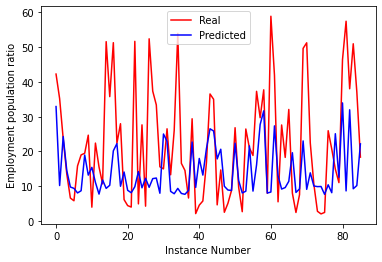

In [ ]:
plt.plot(np.arange(86),ytest,'r')
plt.plot(preds,'b')
plt.legend(['Real','Predicted'])
plt.xlabel("Instance Number")
plt.ylabel("Employment population ratio")
plt.show()

In [ ]:
future=[[i,2021] for i in range(39)]

In [ ]:
futurepreds=model.predict(np.array(future))

C:\Users\rohan\Anaconda3\envs\PTGpu\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


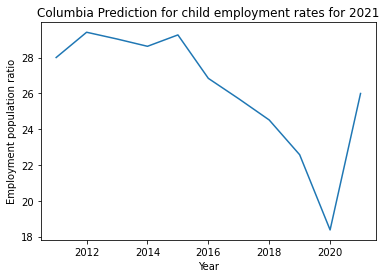

In [ ]:
a=[mldata.iloc[row]['Value'] for row in range(len(mldata)-10,len(mldata))]
a.append(futurepreds[-1])
plt.plot(np.arange(2011,2022),a)
plt.title("Columbia Prediction for child employment rates for 2021")
plt.xlabel("Year")
plt.ylabel("Employment population ratio")
plt.show()

Choose Columbia -> 3rd world country, likely to have more child employment as discussed in section about Child Labor Data analysis

Sharpest drop in child employment population ratio from 2019 -> 2020 because of COVID. However, now with vaccines, AI predicts a steep increase in child employment population ratio for 2021